In [21]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from scipy import optimize

In [22]:
def etan_inp(CC_length, HCC_angle, torsion_CC):
    inp = '''!HF RHF 6-31G
    * int 0 1
    C 0 0 0 0 0 0 
    C 1 0 0 {0} 0 0 
    H 1 2 0 1.08439 {1} 0
    H 1 2 3 1.08439 {1} 120
    H 1 2 3 1.08439 {1} -120
    H 2 1 3 1.08439 {1} {2}
    H 2 1 5 1.08439 {1} 120
    H 2 1 5 1.08439 {1} -120
    *
    '''.format(str(CC_length), str(HCC_angle), str(torsion_CC))
    return inp

In [23]:
HCC_angle = 111.200
torsion_CC = 180
c = 1
for CC_length in np.arange(1.3, 1.7, 0.02):
    with open('orca1_{}.inp'.format(str(c)), 'w') as outfile: 
        outfile.write(etan_inp(CC_length, HCC_angle, torsion_CC))
    c += 1

In [24]:
x_o = np.arange(1.3, 1.7, 0.02)
y_o = np.array([-79.032182528815,
              -79.041744464930,
              -79.049987760274,
              -79.057030879929,
              -79.062982118708,
              -79.067940474889,
              -79.071996424266,
              -79.075232704041,
              -79.077724885145,
              -79.079542037749,
              -79.080747261871,
              -79.081398206818,
              -79.081547522092,
              -79.081243297489,
              -79.080529381646,
              -79.079445870354,
              -79.078029298374,
              -79.076313000680,
              -79.074327372467,
              -79.072100120610])
fitfunc = lambda p, x: p[0]*pow(p[1]-x,2) + p[2] # Target function
errfunc = lambda p, x, y: fitfunc(p, x) - y # Error function

Optimized params: [  0.77459041   1.54783145 -79.08299493]


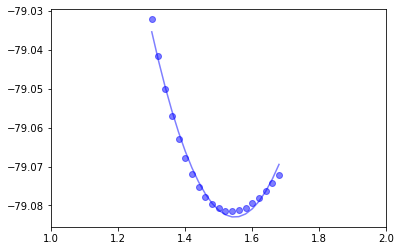

In [25]:
p0 = [1,1, -79] # Initial guess for the parameters
p1, success = optimize.leastsq(errfunc, p0[:], args=(x_o, y_o))
print("Optimized params:", p1)

#Plot it
plt.plot(x_o, y_o, "ro", x_o,fitfunc(p1,x_o),"r-",c='blue',alpha=0.5)
plt.xlim(1,2)
plt.show()

In [26]:
torsion_CC = 180
CC_length = 1.52986
c = 1
for HCC_angle in np.arange(109.2, 113.2, 0.2):
    with open('orca2_{}.inp'.format(str(c)), 'w') as outfile: 
        outfile.write(etan_inp(CC_length, HCC_angle, torsion_CC))
    c += 1

In [27]:
for i in range(1,21):
    print('orca orca2_{0}.inp >orca2_{0}.txt'.format(i))

orca orca2_1.inp >orca2_1.txt
orca orca2_2.inp >orca2_2.txt
orca orca2_3.inp >orca2_3.txt
orca orca2_4.inp >orca2_4.txt
orca orca2_5.inp >orca2_5.txt
orca orca2_6.inp >orca2_6.txt
orca orca2_7.inp >orca2_7.txt
orca orca2_8.inp >orca2_8.txt
orca orca2_9.inp >orca2_9.txt
orca orca2_10.inp >orca2_10.txt
orca orca2_11.inp >orca2_11.txt
orca orca2_12.inp >orca2_12.txt
orca orca2_13.inp >orca2_13.txt
orca orca2_14.inp >orca2_14.txt
orca orca2_15.inp >orca2_15.txt
orca orca2_16.inp >orca2_16.txt
orca orca2_17.inp >orca2_17.txt
orca orca2_18.inp >orca2_18.txt
orca orca2_19.inp >orca2_19.txt
orca orca2_20.inp >orca2_20.txt


In [ ]:
y_o = []
for i in range(1,21):
    with open('orca2_{0}.txt'.format(i),'r') as orc:
        line = orc.readline()
        while line[0:5] != 'FINAL':
            line = orc.readline()
        y_o.append(float(line.split()[4]))
y_o = np.array(y_o)    